In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Loading Data

In [31]:
data=pd.read_csv('/kaggle/input/diamond-price/diamonds.csv')

In [32]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
data.shape

(53940, 11)

# Data Preprocessing

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### There is no missing values

In [35]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### we can see that "x,y, and z" features have min value = 0, we need to drop them.

In [36]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

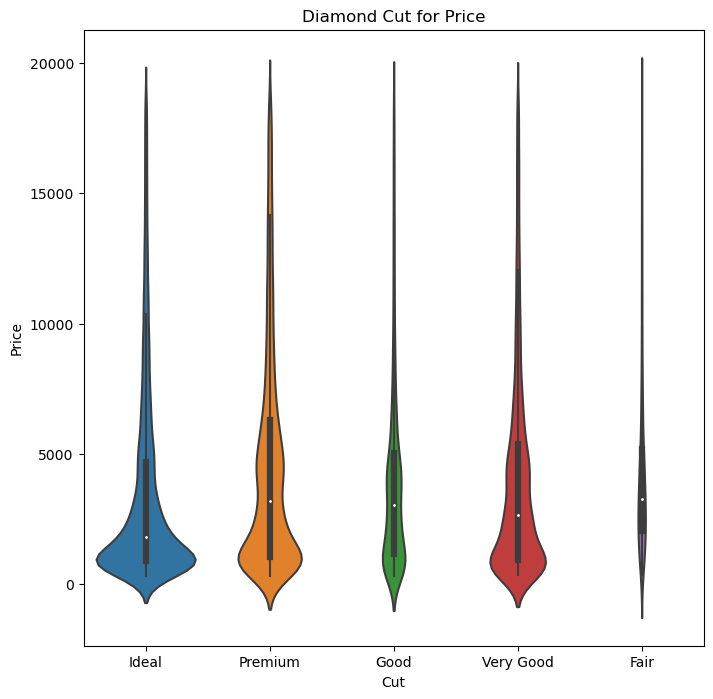

In [37]:
plt.figure(figsize=(8,8))
ax = sns.violinplot(x="cut",y="price", data=data, scale= "count")
ax.set_title("Diamond Cut for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")
plt.show()

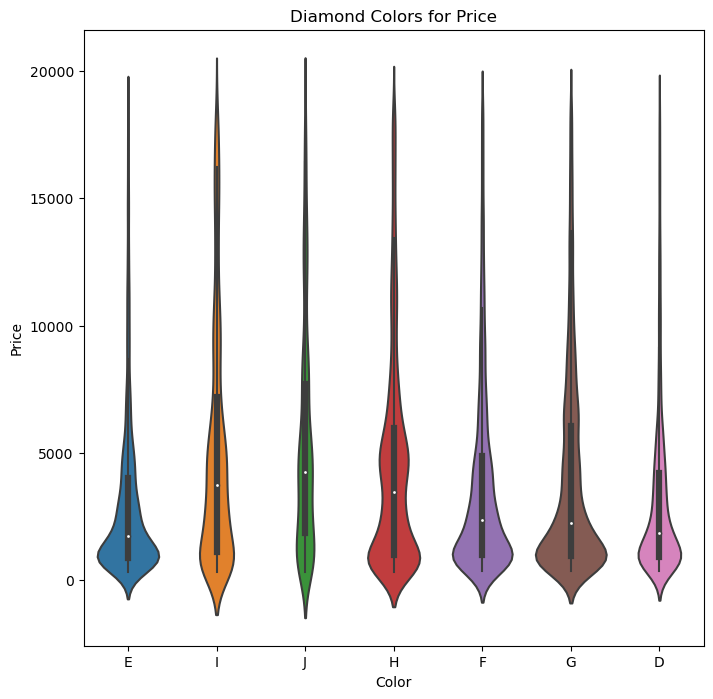

In [38]:
plt.figure(figsize=(8,8))
ax = sns.violinplot(x="color",y="price", data=data, scale= "count")
ax.set_title("Diamond Colors for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")
plt.show()

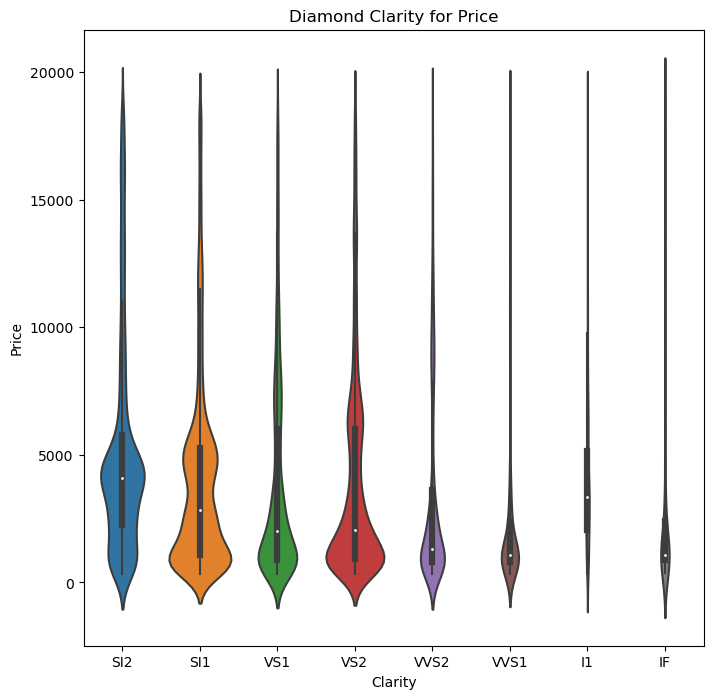

In [39]:
plt.figure(figsize=(8,8))
ax = sns.violinplot(x="clarity",y="price", data=data, scale= "count")
ax.set_title("Diamond Clarity for Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")
plt.show()

### Checking for Outliers

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


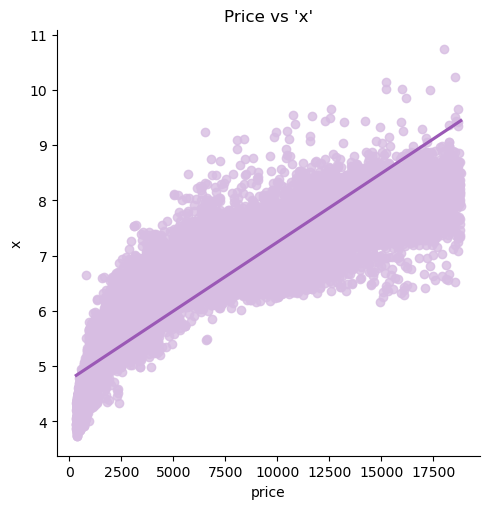

In [40]:
lmplot = sns.lmplot(data=data, x="price", y="x",  
                    scatter_kws={"color": "#D7BDE2"}, line_kws={"color": "#9B59B6"})
plt.title("Price vs 'x'")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


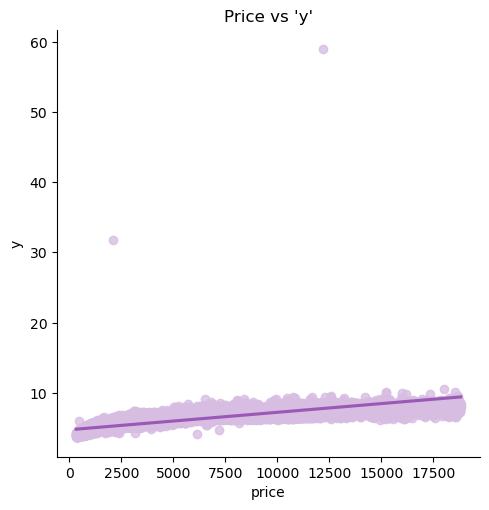

In [41]:
lmplot = sns.lmplot(data=data, x="price", y="y",  
                    scatter_kws={"color": "#D7BDE2"}, line_kws={"color": "#9B59B6"})
plt.title("Price vs 'y'")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


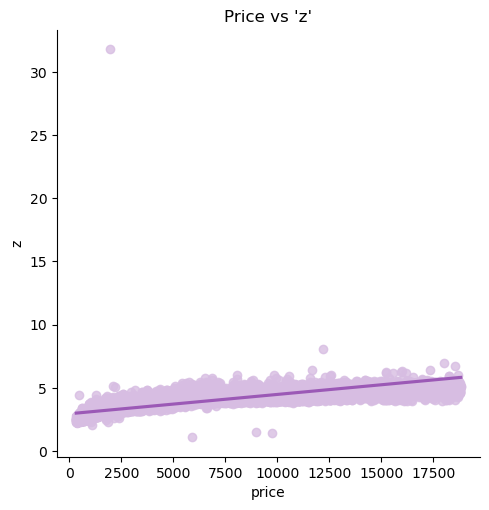

In [42]:
lmplot = sns.lmplot(data=data, x="price", y="z",  
                    scatter_kws={"color": "#D7BDE2"}, line_kws={"color": "#9B59B6"})
plt.title("Price vs 'z'")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


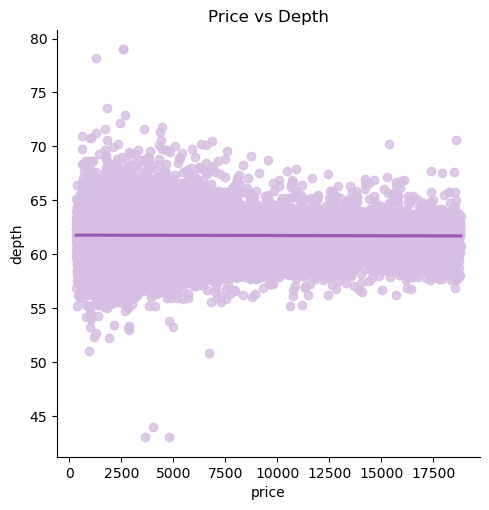

In [43]:
lmplot = sns.lmplot(data=data, x="price", y="depth",  
                    scatter_kws={"color": "#D7BDE2"}, line_kws={"color": "#9B59B6"})
plt.title("Price vs Depth")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


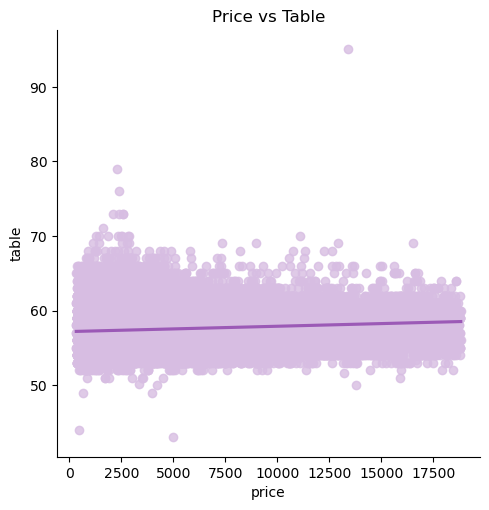

In [44]:
lmplot = sns.lmplot(data=data, x="price", y="table",  
                    scatter_kws={"color": "#D7BDE2"}, line_kws={"color": "#9B59B6"})
plt.title("Price vs Table")
plt.show()

## Data Cleaning

In [45]:
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30) & (data["z"]>2)]
data = data[(data["depth"]<75) & (data["depth"]>45)]
data = data[(data["table"]<80) & (data["table"]>40)]

## Encoding

In [46]:
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data[col] = label_encoder.fit_transform(data[col])

In [47]:
data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,26971.950804,0.797628,2.553379,2.594023,3.835569,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,15570.790852,0.473765,1.027442,1.701286,1.724572,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,1.000000,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,13487.500000,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26975.000000,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.500000,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


## Correlation Matrix

<Axes: >

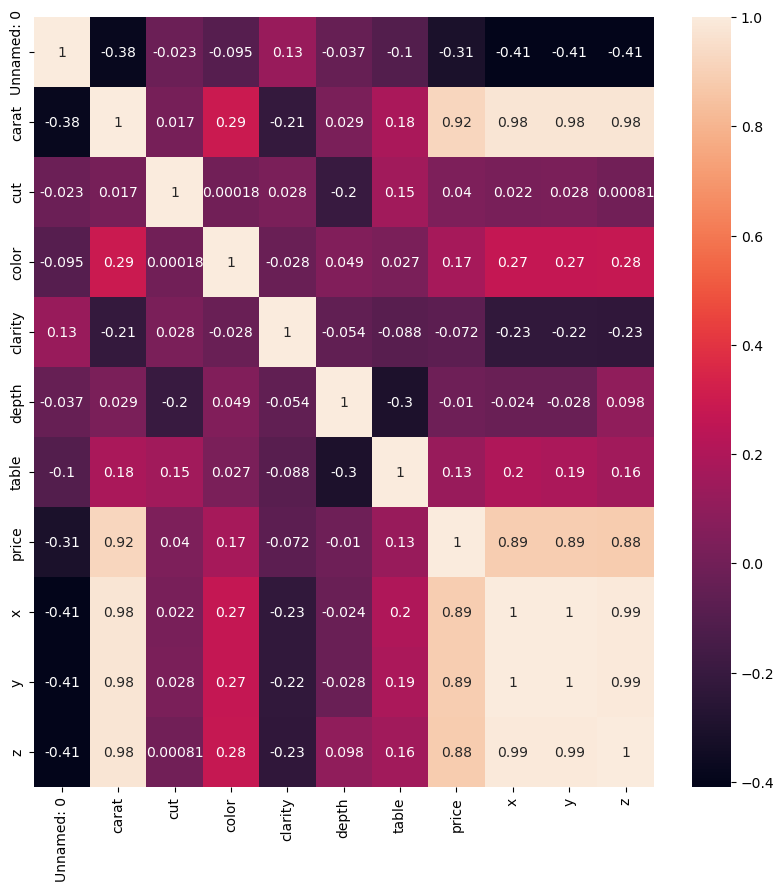

In [48]:
corrmat= data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True, )

### "x", "y" and "z" show a high correlation to the price

# Modeling

In [49]:
X=data.drop('price',axis=1)
y=data['price']

In [50]:
lr = Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

dtr = Pipeline([("scalar2",StandardScaler()),
                     ("dtr",DecisionTreeRegressor())])

knr = Pipeline([("scalar3",StandardScaler()),
                     ("knr",KNeighborsRegressor())])

rfr = Pipeline([("scalar4",StandardScaler()),
                     ("rfr",RandomForestRegressor())])

gbm = Pipeline([("scalar5",StandardScaler()),
                     ("gbm",GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2))])



pipelines = [lr, dtr, knr, rfr, gbm]

pipeline_dict = {0: "LinearRegression",  1: "DecisionTree", 2: "KNeighbors",  3: "RandomForest", 4:"GBM"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X, y)

In [51]:
cv_results_rms = []
for model in pipelines:
    cv_score = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)

mean_scores = [-1 * score.mean() for score in cv_results_rms]
print(dict(zip(pipeline_dict.values(), mean_scores)))

{'LinearRegression': 1290.2917696483753, 'DecisionTree': 489.8779625608177, 'KNeighbors': 843.710261544512, 'RandomForest': 474.68564283270325, 'GBM': 468.5415358443253}
